# Part II - (FordGo Bike Trip Data Presentation)
## by (Bello Victor)


## Investigation Overview


> The goal of this presentation is to provide insight on the FordGo Bike Trip data. The exploration of this dataset has been conducted and insights deduced. The important findings include: the generation distribution of people that take the bike rides, the proportion of riders that share bikes and the duration distribution of rides with regards to type of gender.  



## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It has 183412 rows and 16 columns. Among the variables recorded are: start time, end time, station name, station latitude and longitude.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.dropna(inplace=True)
df.member_birth_year = df.member_birth_year.astype("Int64")
color = sb.color_palette()[0]


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1

> It is infered from the data exploration phase that the generation that takes the most bike rides stem from the 1980's, the year 1988 to be precise. Armed with this information, it is safe to conclude that the distribution of individuals that embark on these bike trips are predominantly below middle age.


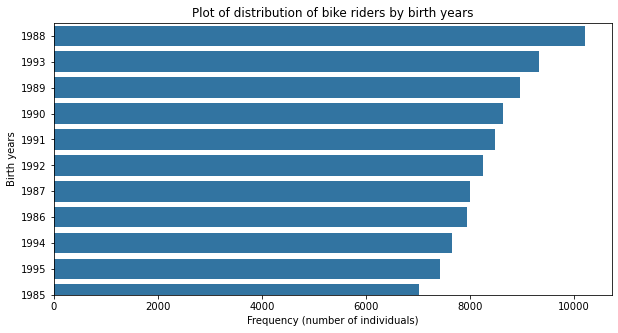

In [25]:
order = df.member_birth_year.value_counts()
type_order = order.index
plt.figure(figsize=(10,5))
sb.countplot(data=df, y="member_birth_year", color=color, order=type_order)
plt.ylim(10)
plt.title("Plot of distribution of bike riders by birth years")
plt.xlabel("Frequency (number of individuals)")
plt.ylabel("Birth years");

## Visualization 2

> I discovered from the dataset explored that the percentage of riders who shared their bikes were significantly less than the the riders who did not share.

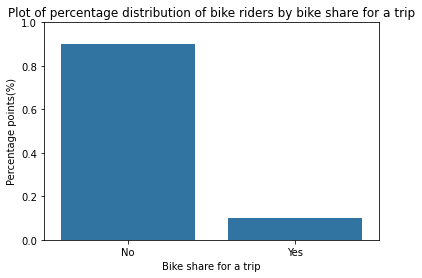

In [15]:
def plot_relative_frequency_of_share_bike_column():
    share_max_count = df.bike_share_for_all_trip.value_counts()[0]
    share_sum = df.bike_share_for_all_trip.value_counts().sum()
    share_max_bar = share_max_count / share_sum
    
    share_ticks = np.arange(0, share_max_bar + 0.2, 0.2)
    share_tick_names = ['{:0.1f}'.format(i) for i in share_ticks]
    
    sb.countplot(data=df, x="bike_share_for_all_trip", color=color);
    plt.yticks(share_ticks * share_sum, share_tick_names);
    plt.title("Plot of percentage distribution of bike riders by bike share for a trip")
    plt.xlabel("Bike share for a trip")
    plt.ylabel("Percentage points(%)")
    

plot_relative_frequency_of_share_bike_column()

## Visualization 3

> I as well discovered that the duration of travel for the type of genders had no discernible variability. This is interesting that the data explored indicated that.



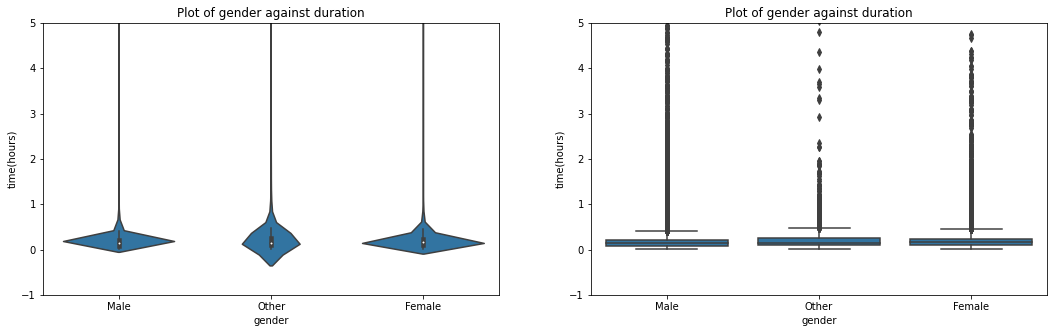

In [8]:
df["duration_hour"] = df["duration_sec"] / (60 * 60)

plt.figure(figsize=[18,5])

plt.subplot(1, 2, 1)

sb.violinplot(data=df, x="member_gender", y="duration_hour", color=color)
plt.ylim(-1, 5)
plt.title("Plot of gender against duration")
plt.xlabel("gender")
plt.ylabel("time(hours)")


plt.subplot(1, 2, 2)

sb.boxplot(data=df, x="member_gender", y="duration_hour", color=color)
plt.ylim(-1, 5)
plt.title("Plot of gender against duration")
plt.xlabel("gender")
plt.ylabel("time(hours)");

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [26]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 641670 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 